# Smith Kaart Oefening 8

<a href="./slides/SmithKaartOefening8.slides.html" target="_blank">![slides](./images/slides-beschikbaar-blue.svg)</a> 
<a href="../Lite/ToegepasteAnalogeElektronica/lab?path=SmithKaartOefening8.ipynb" target="_blank">![slides](./images/open_in-JupyterLite-blue.svg)</a>
<a href="../Deck/ToegepasteAnalogeElektronica/lab?path=SmithKaartOefening8.ipynb" target="_blank">![slides](./images/JupyterDeck-slides-blue.svg)</a>

## Opgave Oefening


Een baantje op een PCB heeft een karakteristieke impedantie van 36 Ohm. De belasting bestaat uit een resistief deel van 108 Ohm en een capacitief deel van 2 pF beide in parallel geschakeld. Gebruik je Smith kaart om aan te passen aan dit baantje voor een frequentie van  2 GHz.
($\lambda_{PCB}$= 80 mm) door het gebruik van een open stukje transmissielijn van de juiste lengte aangebracht op de juiste positie. Bereken deze lengte en positie.

In [6]:
%config InlineBackend.figure_format = 'svg'
%run cursusdef.py

######  Overzicht
 


## Oplossing

De antenne die de belasting is van dit circuit modelleren we als in {numref}`smith8ciran`. 

###### circuit van de aangepaste antenne

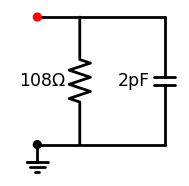

In [14]:
d = schem.Drawing()
reddot=d.add(e.Dot,color='r')
d.add(e.Line(d='right',l=1 ))  
RL=d.add(e.Resistor(d='down',label='108Ω'))
d.add(e.Line(xy=RL.start,d='right',l=2 )) 
d.add(e.Capacitor(d='down',label='2pF'))
d.add(e.Line(tox=reddot.end,d='left' )) 
d.add(e.Ground())
d.add(e.Dot)
d.draw()

Dit geeft een [admittantie](https://nl.wikipedia.org/wiki/Admittantie) van:

###### Initiele waarde van de admittantie

$$Y_L = \frac{1}{R}+ j \omega C$$

$$Y_L = \frac{1}{108}+ j \mspace{2mu} 2 \pi \cdot 2 \mspace{3mu} 10^9 \cdot 2\mspace{3mu}  10^{-12} $$

$$Y_L Z_o= \frac{1}{3}+ j  \mspace{2mu}  0.9$$

We plaatsen de waarde van $Y_L Z_o$ op de Smith kaart van de admittantie en we draaien tot we de cirkel waarbij het reële deel van admittantie 1 is tegenkomen. Dit ziet er uit als in {numref}`smith81`. 

In [15]:
36*(1/108+2*np.pi*2e9j*2e-12)

(0.3333333333333333+0.9047786842338604j)

###### Smith kaart van de admittantie

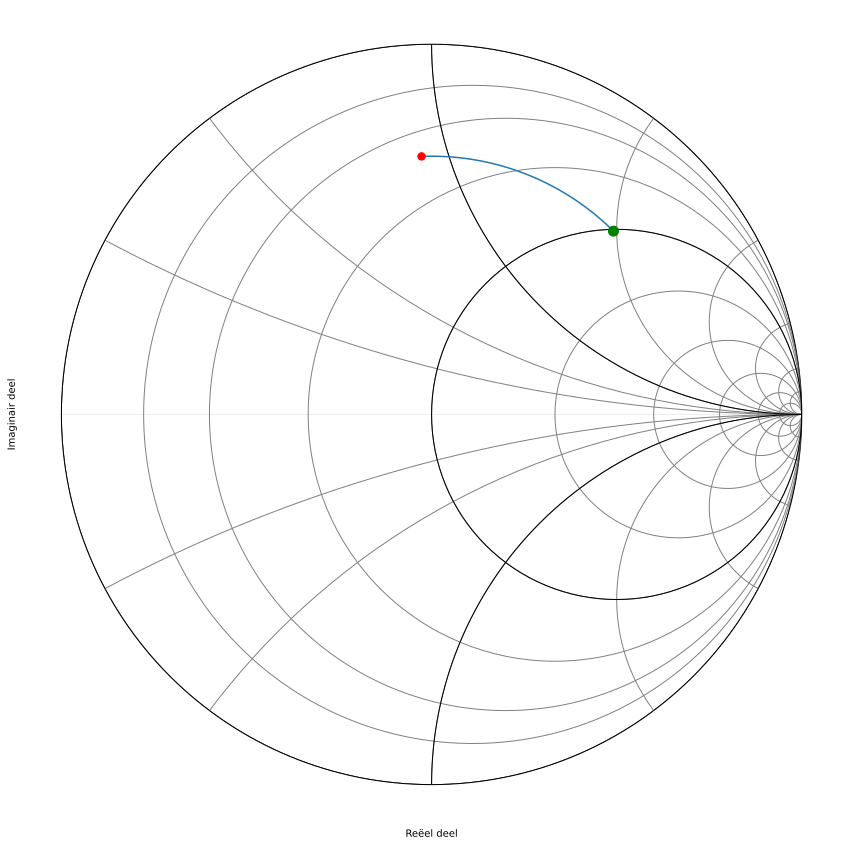

In [28]:
Z_L = 1/(1/108+2*np.pi*2e9j*2e-12)
Z_0 = 36
f_0_str = '2GHz'
freq = rf.Frequency(start=1.98, stop=2.02, npoints=5, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
def smitplot(zlijn,Z_0,tt='z'):
    gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, chart_type=tt, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,48)]
smitplot(ylijn,Y_0)

In [29]:
1/36

0.027777777777777776

###### We kijken nu welke hoek we moeten draaien om deze cirkel te snijden. 
Aangezien de opgave was om dit zo kort mogelijk bij de belasting te doen, kiezen we voor het eerste snijpunt.
Op de kaart lezen we af dat dit na 46  graden is. We hebben dus een stukje van 5.1 mm nodig. In de tabel hieronder zien we dit in meer detail uitgewerkt. Hiervoor kijken we na wanneer de admittantie 1/(36 Ohm) bereikt. Dit is bij 27.77 mS.

###### Berekening admittantie voor verschillende lengtes

In [30]:
ylijnpp=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(45,49)]
def ylijnprint(ylijn,golflengte=8.0):
    print('hoek    admittantie (Siemens)     lengte baantje op PCB (cm)')
    for i,yi in ylijn:
        print('{:4}    Y= {:-.2f}{:+.2f}j mS            lengte={:.2f} cm'.format(i,yi.real*1000,yi.imag*1000, i/360*golflengte/2))
ylijnprint(ylijnpp)

hoek    admittantie (Siemens)     lengte baantje op PCB (cm)
  45    Y= 26.46+52.76j mS            lengte=0.50 cm
  46    Y= 27.36+53.66j mS            lengte=0.51 cm
  47    Y= 28.31+54.58j mS            lengte=0.52 cm
  48    Y= 29.30+55.51j mS            lengte=0.53 cm


In [31]:
54/1000*36

1.944

Het imaginair gedeelte van de y waarde die we op de kaart aflezen is y=1.94 j. We moeten dit dus compenseren door een imaginair deel van y=-1.94 j van de open transmissielijn.
We starten dus de cirkelboog bij y=0 (zie oranje lijn in {numref}`smith82`) en kijken waar deze de waarde van y=+1 j snijdt op de Smith kaart. De lengte van de boog die we hiervoor nodig hebben is 235 graden. Dit komt ook overeen met een lengte van 26.0 mm.

###### admittantie: aanpassing+open transmissielijn

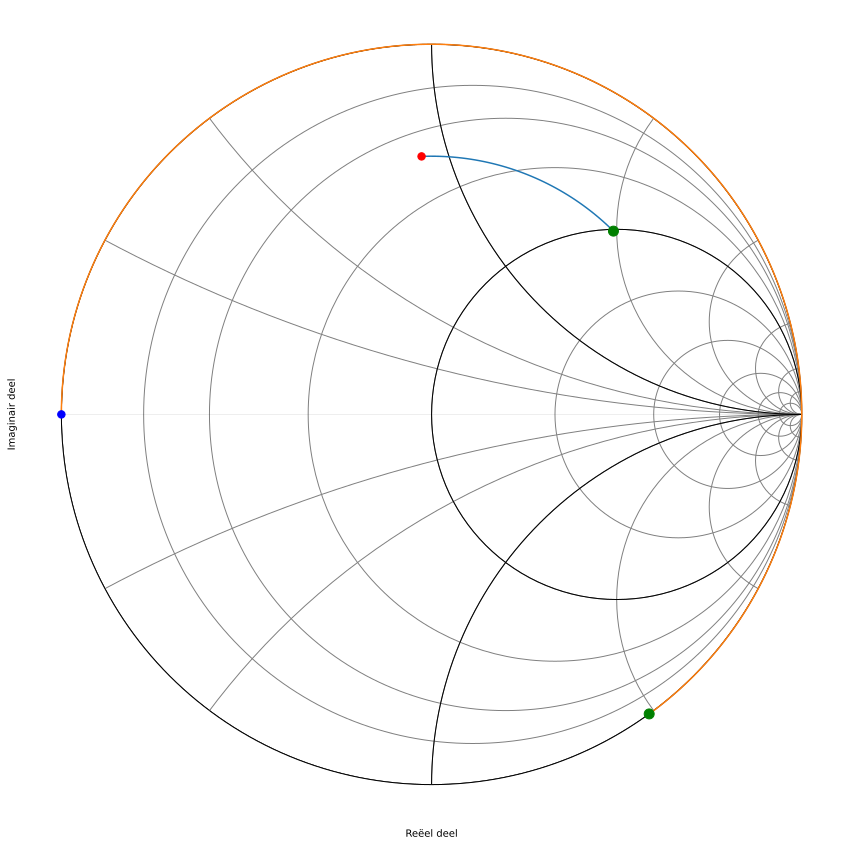

In [40]:
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,235)]

def smitplot2(ylijn,yopenlijn,Y_0):
    gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
    gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([g.real for g in gammaopen],[g.imag for g in gammaopen])
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
    ax.plot([gammaopen[-1].real],[gammaopen[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gammaopen[0].real],[gammaopen[0].imag],color='blue', marker=".", markersize=15)
smitplot2(ylijn,yopenlijn,Y_0)

We kunnen dit ook in tabelvorm uitwerken. Ook hier zoeken we een waarde van 15.625j mS Dit zie je dan hieronder weergegeven.

###### admittantie open transmissielijn als functie van de lengte

In [41]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(233,237)]

def ylijnprint2(ylijn,golflengte=8):
    print('hoek    admitantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}       Y= {:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.imag*1000, i/360*golflengte/2))

ylijnprint2(yopenlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
 233       Y= -55.71j mS     lengte=2.59 cm
 234       Y= -54.52j mS     lengte=2.60 cm
 235       Y= -53.36j mS     lengte=2.61 cm
 236       Y= -52.24j mS     lengte=2.62 cm


{numref}`smith8cir` toont het schema dat we nodig hebben om deze oplossing te realiseren

###### circuit van de aangepaste antenne

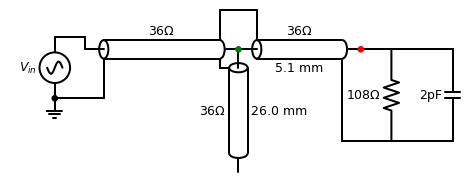

In [45]:
d = schem.Drawing()
d.add(e.Ground())
d.add(e.Dot)
bron=d.add(e.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(e.Line(l=1,d='right') )
d.add(e.Line(l=0.4,d='down') )
coax1=d.add(e.coax(d='right',length=5, label='$36\Omega$'))
d.add(e.Dot,color='g')
coax3=d.add(e.coax(xy=coax1.end,d='down',l=1.5,length=4, label='$36\Omega$', botlabel='26.0 mm'))
d.add(e.Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(e.Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(e.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$36\Omega$', botlabel='5.1 mm'))
d.add(e.Dot,color='r')

d.add(e.Line(xy=coax2.end,d='right',l=1 ))  
RL=d.add(e.Resistor(d='down',label='108Ω'))
d.add(e.Line(xy=RL.start,d='right',l=2 )) 
d.add(e.Capacitor(d='down',label='2pF'))
d.add(e.Line(tox=RL.end,d='left' )) 
d.add(e.Line(xy=coax2.shieldend,toy=RL.end,d='down' )) 
d.add(e.Line(tox=RL.end,d='right' )) 


d.add(e.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(e.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(e.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(e.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(e.Line(toy=coax1.shieldstart,d='up') )
d.draw()